### Core Prediction Question
*Develop a predictive model to estimate the water quality indices of rivers and lakes based on parameters like pH, turbidity, dissolved oxygen, and contaminant levels.*

Authors: Nidhi Nayak, Vishali Kirthi Vallioor
ENERES 131 Final Project

#### Reading In Our Data Sets

In [2]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

zip_file_path = "final_data/narrowresult2.zip"

with zipfile.ZipFile(zip_file_path, 'r') as z:
    file_names = z.namelist()
    
    csv_file_name = [name for name in file_names if name.endswith('.csv')][0]
    
    with z.open(csv_file_name) as f:
        df = pd.read_csv(f)

print(df.head())

/tmp/ipykernel_81/3243917366.py:14: DtypeWarning: Columns (9,10,13,15,17,19,20,21,22,31,33,34,36,38,40,43,48,56,60,61,64,65,70,71) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)


  OrganizationIdentifier                             OrganizationFormalName  \
0                21CABCH  Southern California Coastal Water Research Pro...   
1              CALWR_WQX           California Department Of Water Resources   
2                21CABCH  Southern California Coastal Water Research Pro...   
3                  CEDEN     California State Water Resources Control Board   
4                21CABCH  Southern California Coastal Water Research Pro...   

                          ActivityIdentifier ActivityStartDate  \
0      21CABCH-ENCINAL BEACH SOUTH-4/29/2013        2013-04-29   
1                      CALWR_WQX-BL13B655594        2013-03-19   
2     21CABCH-Crown Bird Sanctuary-10/3/2013        2013-10-03   
3                          CEDEN--2145862758        2013-05-08   
4  21CABCH-Crown Windsurfer Corner-4/29/2013        2013-04-29   

  ActivityStartTime/Time ActivityStartTime/TimeZoneCode  \
0                    NaN                            NaN   
1         

In [3]:
water_potability_df = pd.read_csv('water_potability.csv')
print(water_potability_df.head())

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [6]:
print("NaN Count In Water Potability Dataset: ")
print(water_potability_df.isnull().sum())

print("\nDataset Described (Stats): ")
print(water_potability_df.describe())

NaN Count In Water Potability Dataset: 
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Dataset Described (Stats): 
                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Condu

### EDA

#### Correlation of All Relevant Variables

Text(0.5, 1.0, 'Correlation Matrix')

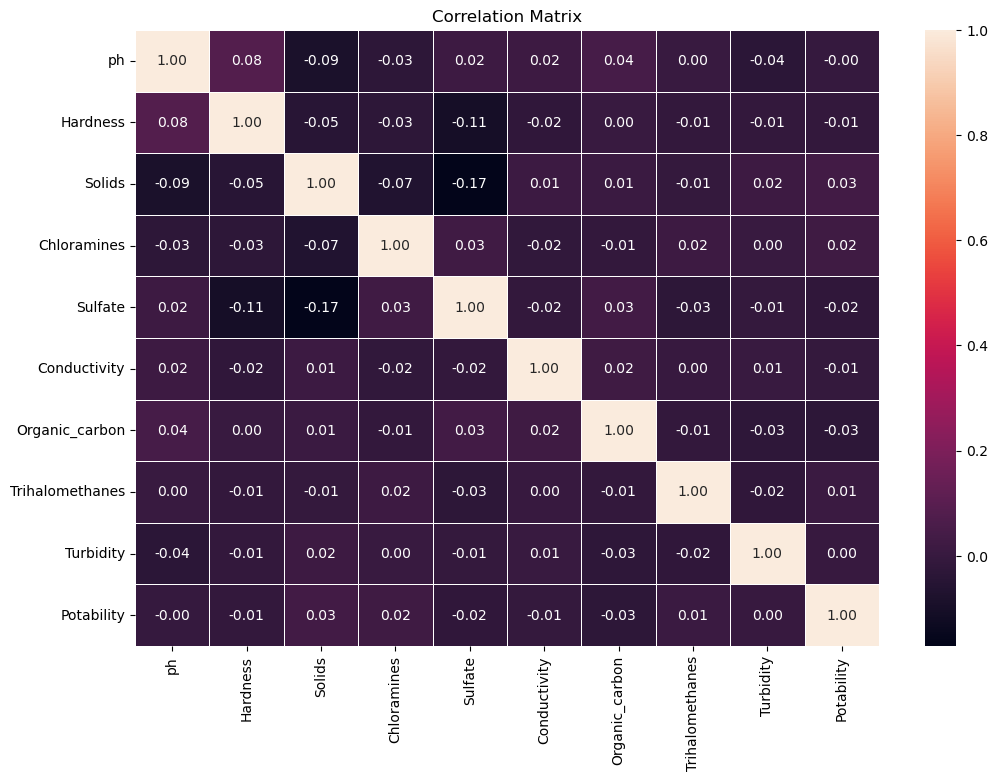

In [32]:
plt.figure(figsize=(12, 8))
corr_matrix = water_potability_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='rocket', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')

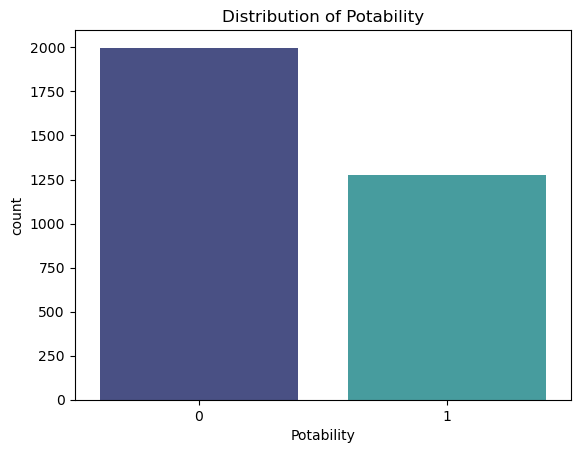

In [36]:
sns.countplot(x='Potability', data=water_potability_df, palette='mako', hue='Potability', legend=False)
plt.title('Distribution of Potability')
plt.show()

#### Taking a Deep Dive into the pH Variable and its Relationship With Other Variables

Text(0, 0.5, 'Frequency')

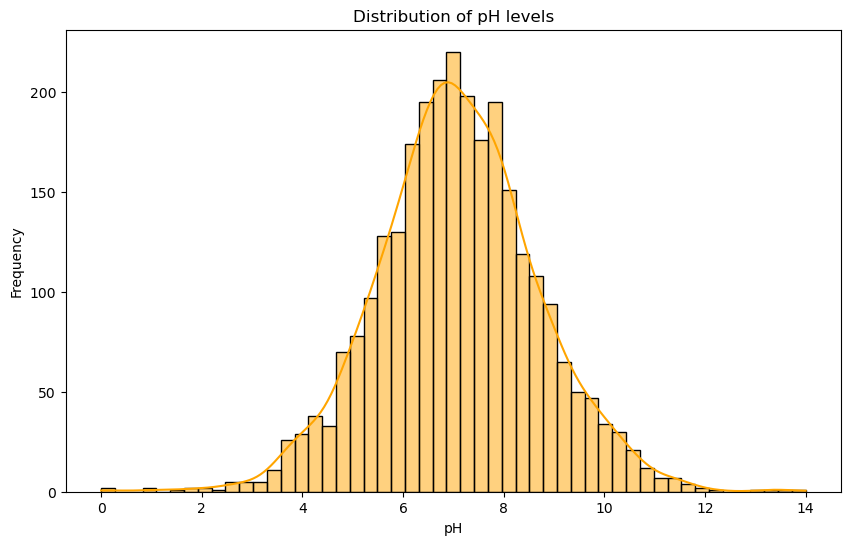

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(water_potability_df['ph'], kde=True, color='orange')
plt.title('Distribution of pH levels')
plt.xlabel('pH')
plt.ylabel('Frequency')

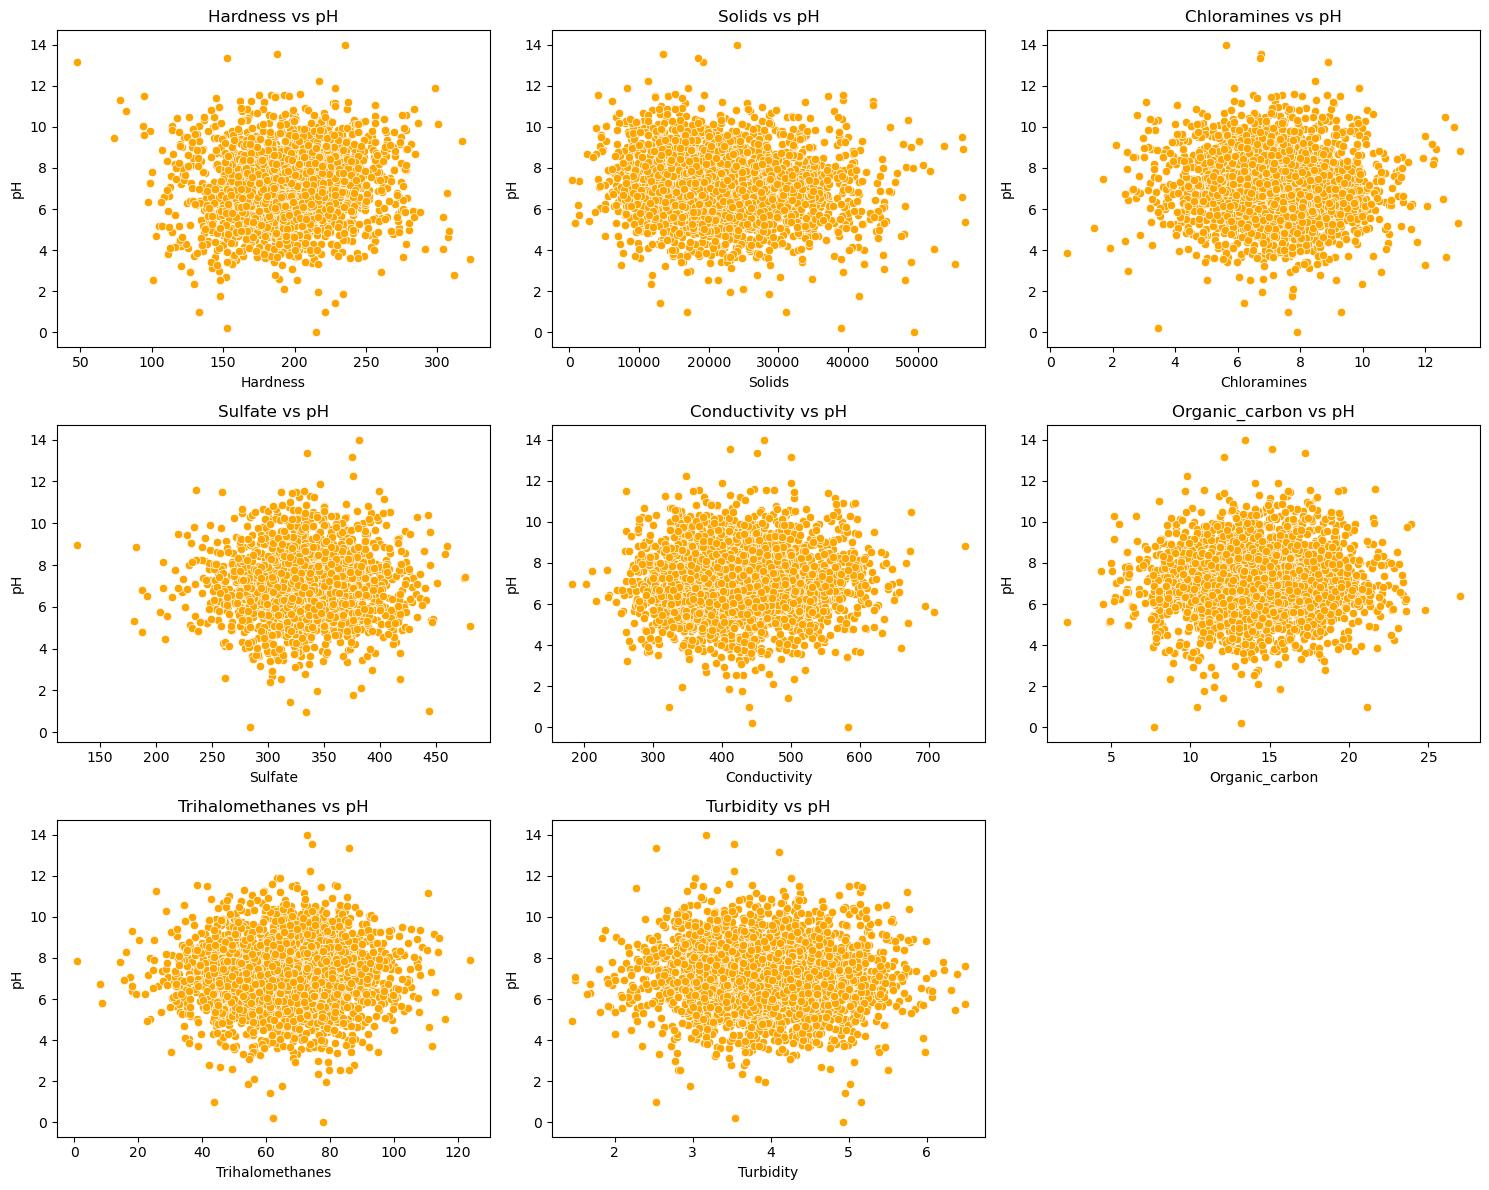

In [15]:
plt.figure(figsize=(15, 12))
interested_features = ['Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

for i, feature in enumerate(interested_features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=water_potability_df[feature], y=water_potability_df['ph'], color='orange')
    plt.title(f'{feature} vs pH')
    plt.xlabel(feature)
    plt.ylabel('pH')

plt.tight_layout()
plt.show()

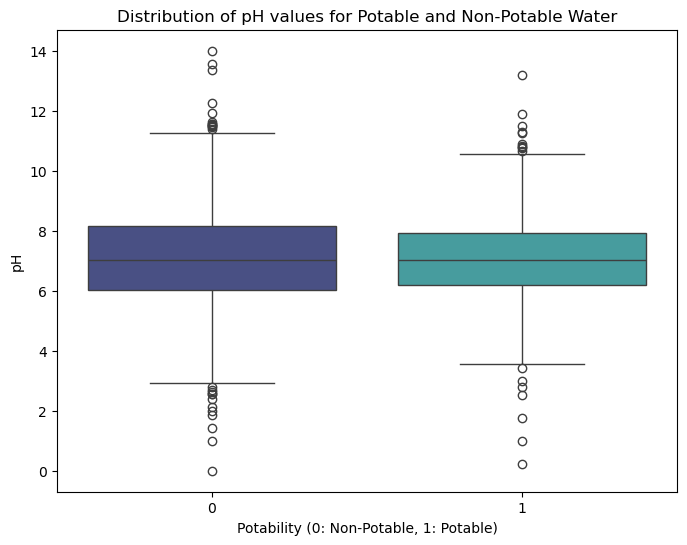

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Potability', y='ph', data=water_potability_df, palette='mako', hue='Potability', legend=False)
plt.title('Distribution of pH values for Potable and Non-Potable Water')
plt.xlabel('Potability (0: Non-Potable, 1: Potable)')
plt.ylabel('pH')
plt.show()

In [31]:
from scipy.stats import ttest_ind

potable_pH = water_potability_df[water_potability_df['Potability'] == 1]['ph'].dropna()
non_potable_pH = water_potability_df[water_potability_df['Potability'] == 0]['ph'].dropna()

t_stat, p_value = ttest_ind(potable_pH, non_potable_pH)
print(f"Calculated p_value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference in pH levels between potable and non-potable water.")
else:
    print("There is no significant difference in pH levels between potable and non-potable water.")


Calculated p_value: 0.8511887790851168
There is no significant difference in pH levels between potable and non-potable water.


### Taking a Deep Dive into the Hardness Variable and its Relationship With Other Variables

Text(0, 0.5, 'Frequency')

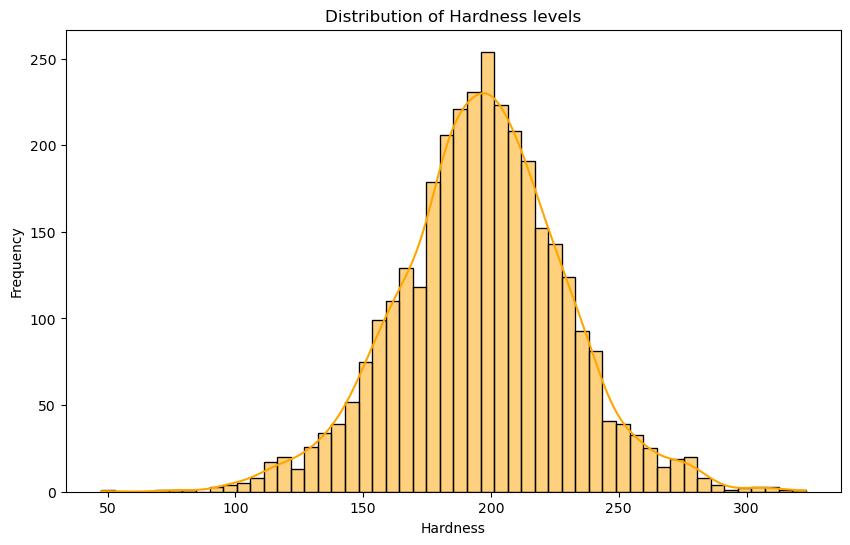

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(water_potability_df['Hardness'], kde=True, color='orange')
plt.title('Distribution of Hardness levels')
plt.xlabel('Hardness')
plt.ylabel('Frequency')

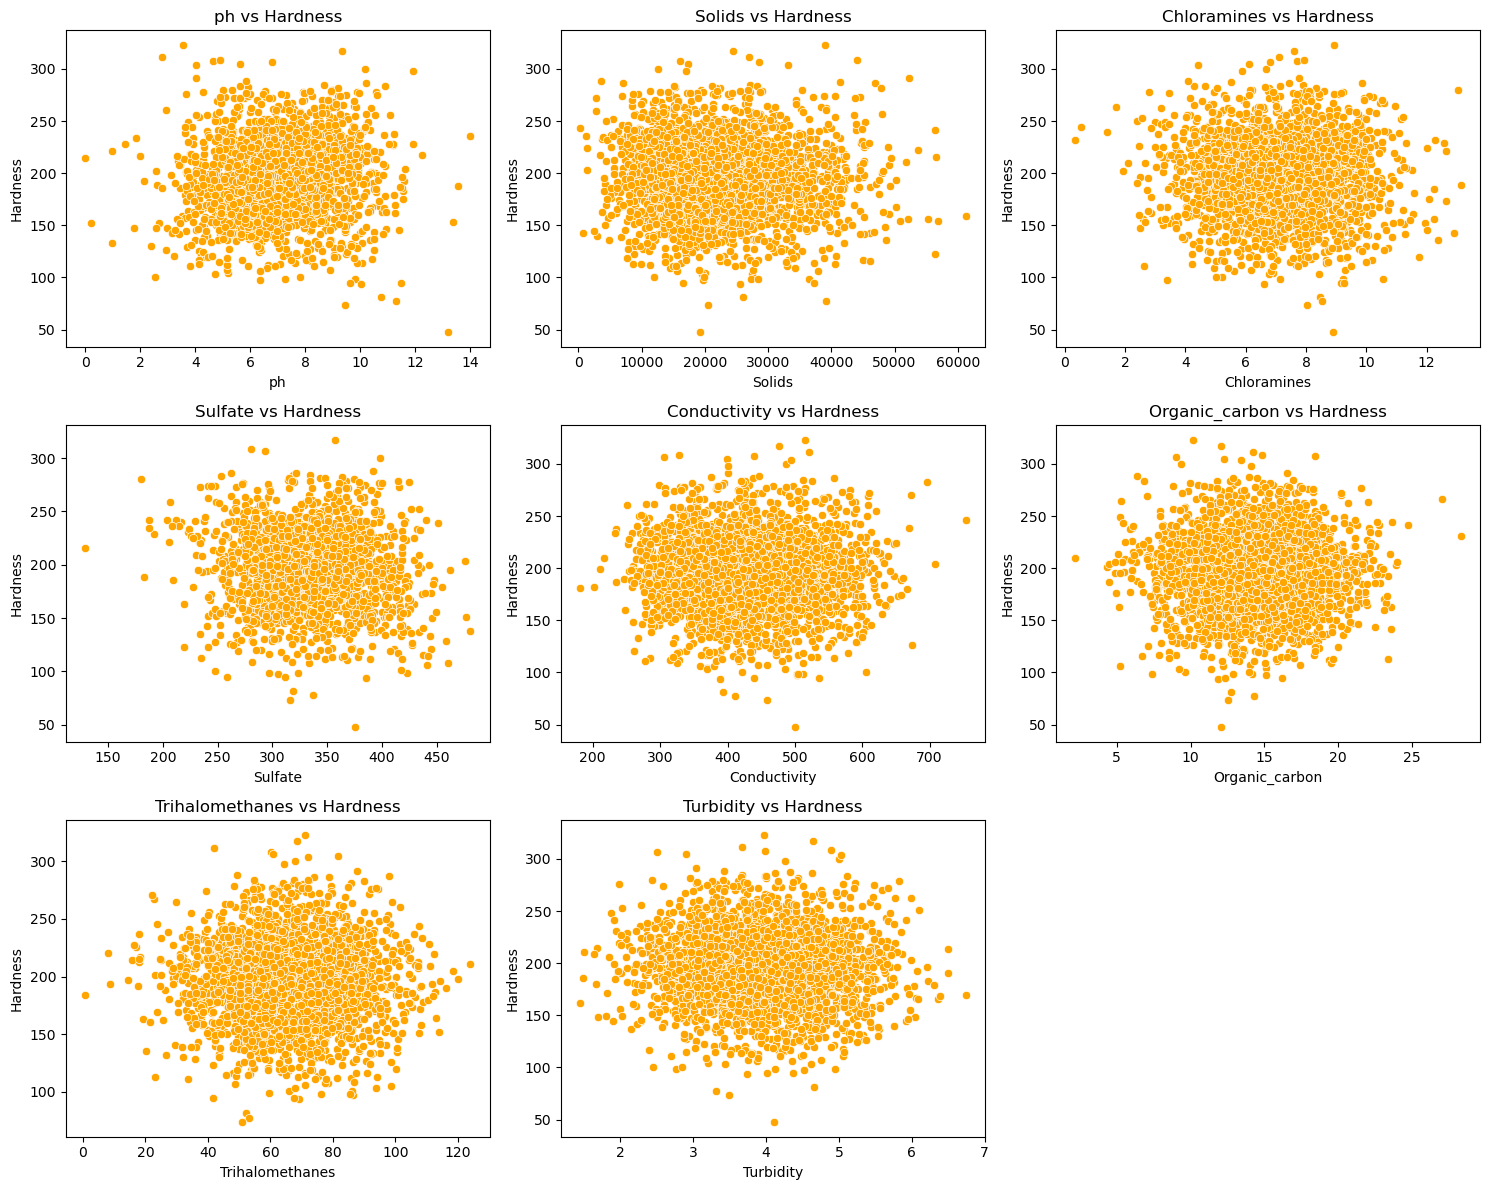

In [34]:
plt.figure(figsize=(15, 12))
interested_features = ['ph', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

for i, feature in enumerate(interested_features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=water_potability_df[feature], y=water_potability_df['Hardness'], color='orange')
    plt.title(f'{feature} vs Hardness')
    plt.xlabel(feature)
    plt.ylabel('Hardness')

plt.tight_layout()
plt.show()

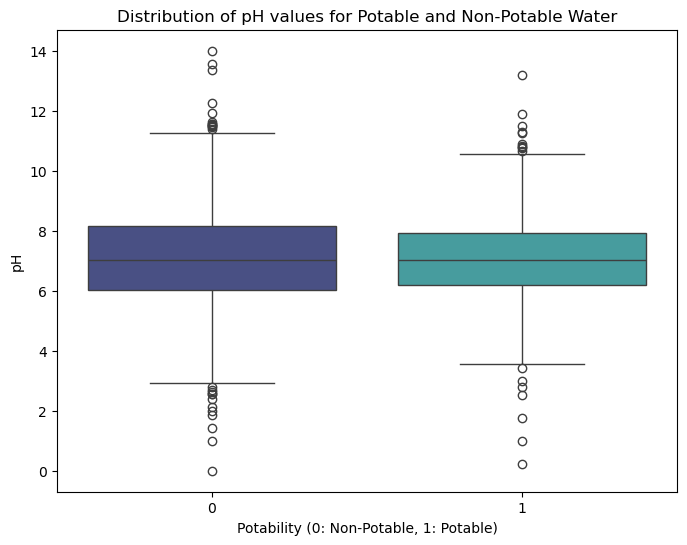

In [37]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Potability', y='ph', data=water_potability_df, palette='mako', hue='Potability', legend=False)
plt.title('Distribution of pH values for Potable and Non-Potable Water')
plt.xlabel('Potability (0: Non-Potable, 1: Potable)')
plt.ylabel('pH')
plt.show()